In [1]:
%matplotlib inline

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from skimage.feature import hog
from skimage import exposure

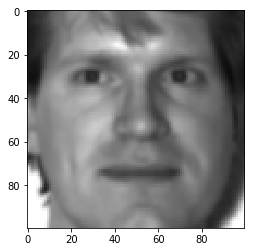

In [2]:
# 从图像数据集中读取数据

imgDir = 'imgs/'
imgs = []
labels = []
for i in range(1, 166):
    fileName = 's' + str(i) + '.bmp'
    img = cv2.imread(imgDir + fileName)
    imgs.append(img)
    labels.append((i - 1) // 11)

plt.imshow(imgs[0])

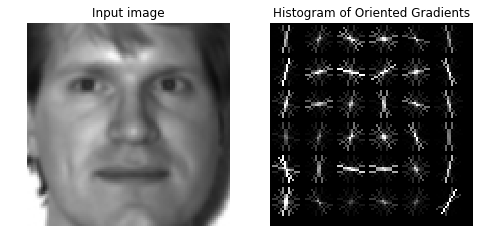

In [3]:
image = imgs[0]

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), block_norm='L2-Hys',
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.savefig('./hog.jpg')
plt.show()

In [4]:
# 提取数据的HOG特征

hog_func = lambda x:hog(x, orientations=8, pixels_per_cell=(16, 16), block_norm='L2-Hys',
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
X_hog = np.array([hog_func(img)[0] for img in imgs])
y = np.array(labels)
print(X_hog.shape)
print(y.shape)

(165, 288)
(165,)


In [5]:
# 将数据集划分为训练集、噪声集

X_noise = X_hog[12*11:, :]
y_noise = y[12*11:]
X_all = X_hog[:12*11, :]
y_all = y[:12*11]
print(X_all.shape)
print(y_all.shape)
print(X_noise.shape)
print(y_noise.shape)

(132, 288)
(132,)
(33, 288)
(33,)


In [6]:
# 利用softmax构造多类分类器，并利用k折交叉验证进行训练

clf = LogisticRegression(random_state=1, solver='lbfgs', multi_class='multinomial')

if os.path.exists('model/noise3_hog_softmax_yale.h5'):
    print('loading model...')
    clf = joblib.load('model/noise3_hog_softmax_yale.h5');
    print('load model successful!')
else:
    print('traing model...')
    rkf = RepeatedKFold(n_splits=4, n_repeats=6, random_state=0)

    pro_max = []
    for i_train, i_test in rkf.split(X_all):
        clf.fit(X_all[i_train], y_all[i_train])
    joblib.dump(clf, "model/noise3_hog_softmax_yale.h5")
    print('train model successful!')

loading model...
load model successful!


G:\Anaconda3\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [7]:
scores = clf.score(X_all, y_all)
print("scores：{}".format(scores))

pro_min = np.min(np.max(clf.predict_proba(X_all), axis=1))
print("The minimum probability of all data corresponding to groundtruth：")
print(pro_min)

pred_noise = clf.predict_proba(X_noise)
print("The maximum probability of noise data：")
print(np.max(pred_noise))

scores：1.0
The minimum probability of all data corresponding to groundtruth：
0.34974333776997113
The maximum probability of noise data：
0.3209240884223266


In [8]:
def Classfilter(clf, X, threshold = 0.33):
    if X.ndim == 1:
        X = X[np.newaxis, :]
    result = ''
    if (np.size(X, 0)  == 1 or np.size(X, 0) == 132): ti = 1
    else: ti = 133
    for i, x in enumerate(X):
        x = x[np.newaxis, :]
        pred_prob = clf.predict_proba(x)
        if (np.max(pred_prob) < threshold):
            result = result + 'Img {} is NOT IN the train dataset\n'.format(i+ti)
        else:
            y = np.argmax(pred_prob)
            result = result + 'Img {} is person: {}\n'.format(i+ti, y+1)
    print(result)

In [9]:
# 预测输出，输入数据为图像
def img_predict(clf, img):
    if img.ndim == 3:
        img = img[np.newaxis, :]
    X = hog_func(img);
    Classfilter(img)

In [10]:
Classfilter(clf, X_all)

Img 1 is person: 1
Img 2 is person: 1
Img 3 is person: 1
Img 4 is person: 1
Img 5 is person: 1
Img 6 is person: 1
Img 7 is person: 1
Img 8 is person: 1
Img 9 is person: 1
Img 10 is person: 1
Img 11 is person: 1
Img 12 is person: 2
Img 13 is person: 2
Img 14 is person: 2
Img 15 is person: 2
Img 16 is person: 2
Img 17 is person: 2
Img 18 is person: 2
Img 19 is person: 2
Img 20 is person: 2
Img 21 is person: 2
Img 22 is person: 2
Img 23 is person: 3
Img 24 is person: 3
Img 25 is person: 3
Img 26 is person: 3
Img 27 is person: 3
Img 28 is person: 3
Img 29 is person: 3
Img 30 is person: 3
Img 31 is person: 3
Img 32 is person: 3
Img 33 is person: 3
Img 34 is person: 4
Img 35 is person: 4
Img 36 is person: 4
Img 37 is person: 4
Img 38 is person: 4
Img 39 is person: 4
Img 40 is person: 4
Img 41 is person: 4
Img 42 is person: 4
Img 43 is person: 4
Img 44 is person: 4
Img 45 is person: 5
Img 46 is person: 5
Img 47 is person: 5
Img 48 is person: 5
Img 49 is person: 5
Img 50 is person: 5
Img 51 is

In [83]:
# 搜索最优阈值
for i in range(2, 10):
    for j in range(1, 10):
        clf = LogisticRegression(random_state=1, solver='lbfgs', multi_class='multinomial')
        rkf = RepeatedKFold(n_splits=i, n_repeats=j, random_state=0)
        
        for i_train, i_test in rkf.split(X_all):
            clf.fit(X_all[i_train], y_all[i_train])
        
        scores = clf.score(X_all, y_all)
        print(i,j)
        print("scores：{}".format(scores))
        
        pro_min = np.min(np.max(clf.predict_proba(X_all), axis=1))
        print(pro_min)
        
        pred_noise = clf.predict_proba(X_noise)
        print(np.max(pred_noise))

2 1
scores：0.9848484848484849
0.2141132373211588
0.2925979389604238
2 2
scores：0.9848484848484849
0.17628704663976777
0.2831434380759011
2 3
scores：0.9621212121212122
0.14751473988897387
0.3069729399418699
2 4
scores：0.946969696969697
0.14791592224518607
0.39176759465042615
2 5
scores：0.9924242424242424
0.17367352600624741
0.3466563870696607
2 6
scores：0.9924242424242424
0.22705140752386987
0.3338648254022202
2 7
scores：0.9848484848484849
0.14590588198774865
0.3194841344038065
2 8
scores：0.9621212121212122
0.1781097316017153
0.36506674441703174
2 9
scores：0.9696969696969697
0.18467034259193033
0.2888497619334338
3 1
scores：0.9848484848484849
0.2193630450778516
0.288756920074222
3 2
scores：1.0
0.16786622696458967
0.29376568003370335
3 3
scores：0.9924242424242424
0.16505783112495848
0.31808346194094206
3 4
scores：0.9924242424242424
0.17677233927237646
0.37038890208799624
3 5
scores：0.9924242424242424
0.18943616157012244
0.3043702543349656
3 6
scores：1.0
0.32586776238980597
0.326066177247